# 6.3 Geographical Visualisation

## Objective: Create a choropleth map

### (Importing Libraries)

### Step 1: Define file paths for the new datasets

### Step 2: Load the datasets

### Step 3: Wrangle and merge data

### Step 4: Create the choropleth map

### Step 5: Save the map

### Further Analysis

- Does the Choropleth Answer Your Questions?

- Group data by neighborhood to get average prices 

- Does the analysis lead you to any new research questions?

In [46]:
import os
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
!pip install geopandas

In [48]:
# Step 1: Define file paths for the new datasets
directory = ''r'/Users/ashwanisherawat/Downloads/Air BNB Amsterdam '
csv_file_path = os.path.join(directory, 'Cleaned_Airbnb_Dataset.csv')
geojson_file_path = os.path.join(directory, 'neighbourhoods.geojson')
neighbourhoods_csv_path = os.path.join(directory, 'neighbourhoods.csv')

In [49]:
# Step 2: Load the datasets
# Load the GeoJSON data
geojson_data = gpd.read_file(geojson_file_path)

# Load the cleaned Airbnb dataset
cleaned_df = pd.read_csv(csv_file_path)

# Load the additional neighbourhoods CSV
neighbourhoods_df = pd.read_csv(neighbourhoods_csv_path)

/var/folders/bv/0q7zxbg57q32000r2xxtsc4c0000gn/T/ipykernel_12135/2306872918.py:6: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_df = pd.read_csv(csv_file_path)


In [50]:
# Step 3: Wrangle and merge data
# Group data by neighborhood to calculate the average price
avg_price_by_neighbourhood = cleaned_df.groupby('neighbourhood_x')['price_x'].mean().reset_index()
avg_price_by_neighbourhood.columns = ['neighbourhood', 'average_price']

# Merge GeoJSON data with the average price data
geo_data = geojson_data.merge(avg_price_by_neighbourhood, left_on='neighbourhood', right_on='neighbourhood', how='left')
geo_data = geo_data[geo_data.geometry.notnull()]  # Ensure valid geometries

# Convert the GeoDataFrame to JSON for folium
geojson_for_map = geo_data.to_json()

In [51]:
# Step 4: Create the choropleth map
amsterdam_map = folium.Map(location=[52.3676, 4.9041], zoom_start=12)

choropleth = folium.Choropleth(
    geo_data=geojson_for_map,
    name="choropleth",
    data=avg_price_by_neighbourhood,
    columns=["neighbourhood", "average_price"],
    key_on="feature.properties.neighbourhood",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Average Airbnb Price (€)"
).add_to(amsterdam_map)

In [52]:
# Step 5: Save the map
map_file_path = os.path.join(directory, 'Airbnb_Average_Price_Map_1.html')
amsterdam_map.save(map_file_path)

map_file_path

'/Users/ashwanisherawat/Downloads/Air BNB Amsterdam /Airbnb_Average_Price_Map_1.html'

### Does the Choropleth Answer Your Questions?

A choropleth map provides a visual representation of how values (e.g., average prices) vary spatially. Here's how it relates to your specific questions:

---

### **1. How does the price of listings vary across different neighborhoods in Amsterdam?**
- **Answer**: Yes, the choropleth directly addresses this question.
  - It visually displays the average price of Airbnb listings for each neighborhood.
  - High-priced neighborhoods (e.g., central areas) and low-priced neighborhoods (e.g., outskirts) are easily identifiable.

---

### **2. Is there a correlation between the type of room (e.g., entire home, private room) and the price of the listing?**
- **Answer**: No, the choropleth does not address this question.
  - Room types (e.g., entire home, private room) are not included in this visualization.
  - A boxplot or categorical plot would be more suitable.

---

### **3. What is the relationship between the number of reviews per month and the price of the listing?**
- **Answer**: No, the choropleth does not address this question.
  - Scatterplots or correlation matrices would be better suited for examining numerical relationships like this.

---

### **4. How does the host's listing count affect the average reviews per month?**
- **Answer**: No, the choropleth does not include host-related variables.
  - This requires aggregating host-specific data and analyzing listing count vs. reviews per month.

---

### **5. Does the availability of listings correlate with their price and review count?**
- **Answer**: No, the choropleth does not include availability or review data.
  - This analysis requires additional numerical plots or statistical summaries.

---

### **6. Which neighborhoods have the highest-priced listings, and how does this compare with other variables like room type and review count?**
- **Answer**: Partially.
  - The choropleth identifies high-priced neighborhoods.
  - However, it doesn’t compare this information with room types or review counts. A combined visualization or additional layers on the map would be needed.

---

### **7. Do hosts with multiple listings charge higher prices or receive more reviews compared to hosts with single listings?**
- **Answer**: No, the choropleth does not include host-specific data.
  - Host-level analysis requires aggregating data by `host_id`.

---

### **8. How can sentiment analysis on customer reviews provide insights into guest experiences and their relationship with room types or pricing?**
- **Answer**: No, the choropleth does not include textual data or sentiment analysis.
  - This requires processing customer reviews with text analysis tools like `nltk` or `TextBlob`.

---

### **Summary**
The choropleth map effectively answers:
- **Question 1** (price variation by neighborhood).
- **Partially answers Question 6** (highest-priced neighborhoods).

To address the remaining questions, additional visualizations, numerical analyses, and text processing are required.

Let me know which question you'd like to explore further!

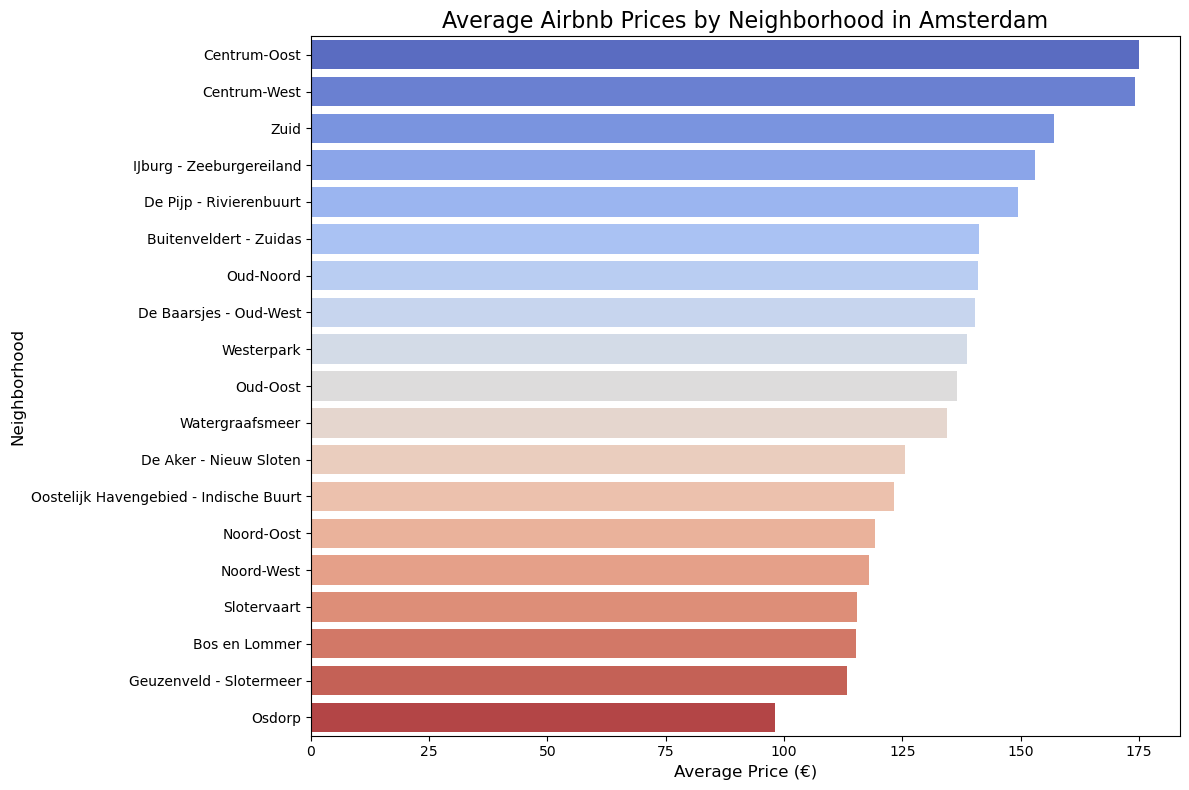

In [53]:
# Group data by neighborhood to get average prices
avg_price_by_neighbourhood = cleaned_df.groupby('neighbourhood_x')['price_x'].mean().reset_index()
avg_price_by_neighbourhood = avg_price_by_neighbourhood.sort_values(by='price_x', ascending=False)
avg_price_by_neighbourhood.columns = ['Neighborhood', 'Average Price (€)']

# Create a bar chart to visualize price variation by neighborhood
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_price_by_neighbourhood, x='Average Price (€)', y='Neighborhood', palette='coolwarm')
plt.title('Average Airbnb Prices by Neighborhood in Amsterdam', fontsize=16)
plt.xlabel('Average Price (€)', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.tight_layout()
plt.show()


## Does the analysis lead you to any new research questions?

Yes, the analysis opens up several new avenues for research based on the insights gained from the choropleth map and other visualizations. Here are some potential new research questions which i have found.

---

### **New Research Questions**

1. **Price Factors Across High-Priced Neighborhoods**:
   - Why are some neighborhoods consistently more expensive? 
   - Are the high prices influenced by proximity to tourist attractions, amenities offered, or host strategies?

2. **Price Variability Within Neighborhoods**:
   - Is there significant variability in prices within the same neighborhood?
   - What factors (e.g., room type, property size, host profile) explain this variability?

3. **Impact of Room Type on Neighborhood Prices**:
   - How does the distribution of room types (e.g., Entire Home/Apt, Private Room) affect the average price of a neighborhood?
   - Are neighborhoods with more Entire Home listings generally more expensive?

4. **Demand Patterns in Lower-Priced Neighborhoods**:
   - Do lower-priced neighborhoods attract more reviews due to affordability?
   - How does the review count relate to occupancy rates in these neighborhoods?

5. **Influence of Host Strategies**:
   - Do hosts with multiple listings dominate high-priced neighborhoods?
   - Is there evidence of price optimization or clustering by hosts?

---

### **Potential Next Steps**
- **Deeper Data Analysis**:
   - Explore new variables (e.g., amenities, transport links, distance from city center).
   - Perform sentiment analysis on reviews to link guest experiences with pricing.

- **Geospatial and Temporal Analysis**:
   - Analyze pricing trends across different time periods (e.g., peak tourist seasons).
   - Examine geospatial clustering of high/low-priced listings.

- **Behavioral Insights**:
   - Study guest booking behaviors in relation to pricing and reviews.
   - Investigate host strategies for dynamic pricing.

---


In [54]:
# Question 1 & 2: Price Factors Across High-Priced Neighborhoods and Price Variability Within Neighborhoods
# Group data by neighborhood to calculate mean and standard deviation of prices
price_stats_by_neighbourhood = (
    cleaned_df.groupby('neighbourhood_x')['price_x']
    .agg(['mean', 'std'])
    .reset_index()
)
price_stats_by_neighbourhood.columns = ['neighbourhood', 'average_price', 'price_std_dev']


In [55]:
# Merge GeoJSON data with price statistics
geo_data = geojson_data.merge(
    price_stats_by_neighbourhood, left_on='neighbourhood', right_on='neighbourhood', how='left'
)
geo_data = geo_data[geo_data.geometry.notnull()]

# Convert GeoDataFrame to JSON for Folium
geojson_for_map = geo_data.to_json()

In [56]:
# Create the base map
amsterdam_map = folium.Map(location=[52.3676, 4.9041], zoom_start=12)

# Add choropleth layer for average prices
choropleth_avg_price = folium.Choropleth(
    geo_data=geojson_for_map,
    name="Average Price",
    data=price_stats_by_neighbourhood,
    columns=["neighbourhood", "average_price"],
    key_on="feature.properties.neighbourhood",
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Average Price (€)"
).add_to(amsterdam_map)

In [57]:
# Add choropleth layer for price variability
choropleth_std_dev = folium.Choropleth(
    geo_data=geojson_for_map,
    name="Price Variability",
    data=price_stats_by_neighbourhood,
    columns=["neighbourhood", "price_std_dev"],
    key_on="feature.properties.neighbourhood",
    fill_color="PuRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Price Variability (Standard Deviation)"
).add_to(amsterdam_map)

In [58]:
# Add popups for detailed neighborhood information
for _, row in geo_data.iterrows():
    if pd.notnull(row['average_price']):
        popup_text = f"""<b>Neighborhood:</b> {row['neighbourhood']}<br>
                         <b>Average Price:</b> €{row['average_price']:.2f}<br>
                         <b>Price Variability:</b> ±€{row['price_std_dev']:.2f}"""
        folium.Marker(
            location=[
                row.geometry.centroid.y,
                row.geometry.centroid.x
            ],
            popup=folium.Popup(popup_text, max_width=300)
        ).add_to(amsterdam_map)

In [59]:
# Save the map
map_file_path = os.path.join(directory, 'Airbnb_Average_Price_Map_2.html')
amsterdam_map.save(map_file_path)

map_file_path


'/Users/ashwanisherawat/Downloads/Air BNB Amsterdam /Airbnb_Average_Price_Map_2.html'